# Module Test Template

## Module & Test Description

This Notebook is used to test positive and negative moment segments of PM diagram.

### Imports
##### General Imports

In [1]:
import os, sys, pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc
import shapely as sh

##### Extend PYPATH to current folder:
This allows importing libraries from the same folder; <code>pathlib.Path().resolve()</code> returns the path of the current directory.

In [2]:
sys.path.extend([pathlib.Path().resolve()])

Import specific testing modules:

In [3]:
import rccolumn
import rcmaterials
import rcutilities

rcmaterials <version 0.0.6> successfully imported
rccolumn <version 0.0.4> successfully imported
rcutilities <version 0.0.1> successfully imported


## Input Values for Test Column Section

In [4]:
c_comp = rccolumn.CCOMP
c_tens = rccolumn.CTENS

concrete = rcmaterials.ConcreteMaterial(5000)
bw = 16
h = 16

rebar = rcmaterials.RebarMaterial(60000)
layer_distances = np.array([2.5, 13.5])
layer_bar_sizes = np.array([9, 9])
layer_bar_counts = np.array([2, 4])

d = max(layer_distances)

In [5]:
# Create function for returning array with total layer area by layer:
def get_layer_areas(layer_bar_sizes, layer_bar_counts, rebar: rcmaterials.RebarMaterial):
    layers = layer_bar_counts.shape[0]
    layer_areas = np.zeros(layers)
    for i in range(layers):
        layer_areas[i] = rebar.bar_areas[layer_bar_sizes[i]] * layer_bar_counts[i]
    return layer_areas

In [6]:
layer_areas = get_layer_areas(layer_bar_sizes, layer_bar_counts, rebar)
layer_areas

array([2., 4.])

In [7]:
zs = rccolumn.get_half_zs(bw, h, layer_distances, layer_areas, concrete, rebar)
cs = rccolumn.get_half_cs(zs, d, concrete, rebar)
ps, ms, strains = rccolumn.get_half_pm(cs, bw, h, layer_distances, layer_areas, concrete, rebar)

In [8]:
ps_design, ms_design = rccolumn.get_design_pm_points(cs, bw, h, layer_distances, layer_areas, concrete, rebar, has_spirals = False, is_capped = False)
ps_capped, ms_capped = rccolumn.get_design_pm_points(cs, bw, h, layer_distances, layer_areas, concrete, rebar, has_spirals = False, is_capped = True)

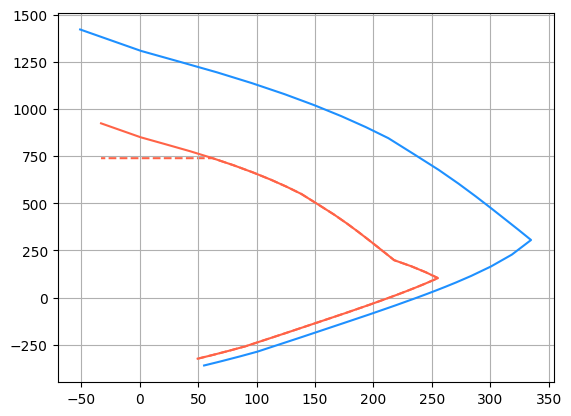

In [9]:
plt.plot(ms / 12000, ps / 1000, color="dodgerblue")
plt.plot(ms_design / 12000, ps_design / 1000, color="tomato")

#plt.scatter(ms_capped / 12000, ps_capped / 1000, color="tomato", s=50)
plt.plot(ms_capped / 12000, ps_capped / 1000, color="tomato", linestyle="dashed", zorder=-2)
plt.grid()

#plt.xlim([50,275])
#plt.ylim([-350,150])

In [10]:
## Flip side
layer_bar_counts = np.flip(layer_bar_counts)
layer_areas_r = get_layer_areas(layer_bar_sizes, layer_bar_counts, rebar)

In [11]:
zsr = rccolumn.get_half_zs(bw, h, layer_distances, layer_areas_r, concrete, rebar)
csr = rccolumn.get_half_cs(zsr, d, concrete, rebar)
psr, msr, strainsr = rccolumn.get_half_pm(csr, bw, h, layer_distances, layer_areas_r, concrete, rebar)

ps_designr, ms_designr = rccolumn.get_design_pm_points(csr, bw, h, layer_distances, layer_areas_r, concrete, rebar, has_spirals = False, is_capped = True)
ps_cappedr, ms_cappedr = rccolumn.get_design_pm_points(csr, bw, h, layer_distances, layer_areas_r, concrete, rebar, has_spirals = False, is_capped = False)

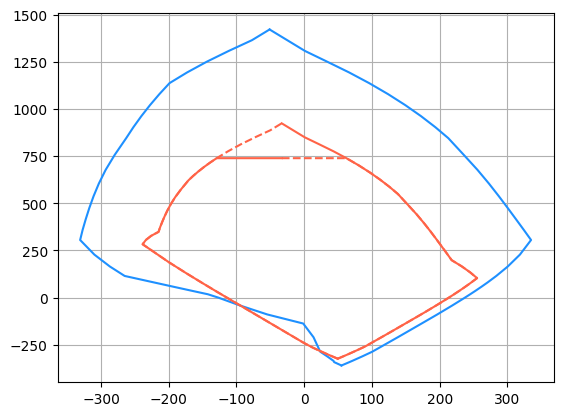

In [12]:
plt.plot(ms / 12000, ps / 1000, color="dodgerblue")
plt.plot(ms_design / 12000, ps_design / 1000, color="tomato")
plt.plot(ms_capped / 12000, ps_capped / 1000, color="tomato", linestyle="dashed")
#plt.scatter(ms_capped / 12000, ps_capped / 1000, color="tomato", s=50)

plt.plot(-msr / 12000, ps / 1000, color="dodgerblue")
plt.plot(-ms_designr / 12000, ps_designr / 1000, color="tomato")
plt.plot(-ms_cappedr / 12000, ps_cappedr / 1000, color="tomato", linestyle="dashed")
#plt.scatter(-ms_cappedr / 12000, ps_cappedr / 1000, color="tomato", s=50)
plt.grid()

In [13]:
rccolumn.min_z(rebar)

-57.99999999999999